In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import *

import re
%matplotlib inline

In [2]:
filepath = 'Assignment/'
df_train = pd.read_csv(filepath + 'data_train.csv')
df_train.shape
df_test = pd.read_csv(filepath + 'data_test.csv')
df_test.shape

(892816, 57)

In [3]:
df_train.describe(include='all')

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
count,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,...,184208.000000,596000.000000,329072.000000,596000.000000,584497.000000,596000.000000,595430.000000,596000.000000,596000.000000,596000.000000
mean,297999.500000,1.900423,4.423356,0.393743,0.257015,0.163933,0.185309,0.000374,0.001693,0.009435,...,0.601744,0.725106,0.525365,6.555000,0.947608,0.832077,1.331161,0.992136,62.215570,0.036436
std,172050.524555,1.983855,2.699861,0.488579,0.436988,0.370215,0.388548,0.019340,0.041111,0.096672,...,0.489540,2.153319,0.499357,5.501419,0.222817,0.373798,0.976544,0.091613,33.012105,0.187373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,148999.750000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,0.000000
50%,297999.500000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,0.000000
75%,446999.250000,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000,0.000000
max,595999.000000,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000,1.000000


In [4]:
df_test.describe(include='all')

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,...,892811.000000,275905.000000,892816.000000,492457.000000,892816.000000,875485.000000,892816.000000,891939.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,4.413734,0.393246,0.257191,0.163659,0.185905,0.000373,0.001595,0.009376,...,0.829951,0.602138,0.725798,0.525717,6.564297,0.947957,0.832311,1.330200,0.992134,62.284293
std,4.296830e+05,1.986503,2.700149,0.488471,0.437086,0.369966,0.389030,0.019309,0.039905,0.096375,...,0.375676,0.489457,2.154886,0.499339,5.500485,0.222114,0.373590,0.976495,0.091530,33.003714
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.720218e+05,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,7.443070e+05,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,1.116308e+06,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,94.000000
max,1.488026e+06,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


In [5]:
for i in range(1,15):
        name = 'cat' + str(i)
        df_train[name] = pd.Categorical(df_train[name])
        df_test[name] = pd.Categorical(df_test[name])       

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)
        

In [7]:
display_all(df_train.head().T)

,0,1,2,3,4
id,0,1,2,3,4
num1,2,1,5,0,0
num2,5,7,9,2,0
num3,0,0,0,1,1
num4,1,0,0,0,0
num5,0,1,1,0,0
num6,0,0,0,0,0
num7,0,0,0,0,0
num8,0,0,0,0,0
num9,0,0,0,0,0


In [8]:
df_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596000 entries, 0 to 595999
Data columns (total 58 columns):
id        596000 non-null int64
num1      596000 non-null int64
num2      596000 non-null int64
num3      596000 non-null int64
num4      596000 non-null int64
num5      596000 non-null int64
num6      596000 non-null int64
num7      596000 non-null int64
num8      596000 non-null int64
num9      596000 non-null int64
num10     596000 non-null int64
num11     596000 non-null int64
num12     596000 non-null int64
num13     596000 non-null int64
num14     596000 non-null int64
num15     596000 non-null int64
num16     596000 non-null float64
num17     596000 non-null float64
num18     488091 non-null float64
num19     595995 non-null float64
num20     595999 non-null float64
num21     596000 non-null float64
num22     553333 non-null float64
num23     596000 non-null float64
der1      596000 non-null float64
der2      596000 non-null float64
der3      596000 non-null float64
der

In [9]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

num18    107909
num19         5
num20         1
num22     42667
cat1        217
cat2         83
cat3       5814
cat4        107
cat5          5
cat6     411792
cat8     266928
cat10     11503
cat12       570
dtype: int64

In [10]:
def is_numeric_dtype(col):
    if col.dtype == 'int64' or col.dtype == 'float64' or col.dtype == 'bool':
        return 1
    else :
        return 0

def preprocesstrain(df):
    meddict =  {}
#     for i in range(1,20):
#         name = 'der' + str(i)
#         df = df.drop(columns=name)
    
    for n,c in df.items():
        if is_numeric_dtype(c):
            med = c.median()
            if pd.isnull(c).sum(): 
                df[n] = c.fillna(med)
            meddict[n] = med
                
    return df,meddict

def preprocesstest(df,meddict):
    
#     for i in range(1,20):
#         name = 'der' + str(i)
#         df = df.drop(columns=name)
        
    for n,c in df.items():
        if is_numeric_dtype(c):
            if pd.isnull(c).sum():
                med = meddict[n]
                df[n] = c.fillna(med)
                
    return df

def numericalize(df,col,name):
    if not is_numeric_dtype(col):
        df[name] = df[name].cat.codes+1
        
def split_vals(a,n): return a[:n].copy(), a[n:].copy()   

In [11]:
def GetPCA(df,var):
    scaler = StandardScaler()
    scaler.fit(df)
    df_img = scaler.transform(df)
    pca = PCA(var)
    pca.fit(df_img)
    return pca

In [12]:
def GetTrainData(df_raw):
    
    median_dict = {}
    
    df = df_raw.copy()
    y = df['target'].values
    df.drop(['id','target'],axis=1,inplace=True)
    df.head().T
    
    df,median_dict = preprocesstrain(df)
    
    for n,c in df.items():
        numericalize(df,c,n)
        
    return df,y,median_dict

def GetTrainValid(df,y,n_valid):
   
    n_train = len(df) - n_valid
    X_train, X_valid = split_vals(df,n_train)
    y_train, y_valid = split_vals(y,n_train)
    
    return X_train,y_train,X_valid,y_valid


In [13]:
mediandict = {}
df,y,mediandict = GetTrainData(df_train)
X_train,y_train,X_valid,y_valid = GetTrainValid(df,y,25000)

In [14]:
corrdata = df.iloc[:,0:42]
corrdata.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,der10,der11,der12,der13,der14,der15,der16,der17,der18,der19
num1,1.000000,0.007679,-0.095376,0.006827,0.062614,0.067949,0.003133,0.002170,0.003110,0.002541,...,0.000537,0.000631,0.000322,-0.000594,0.001919,-0.000461,-0.000310,0.003081,-0.001855,0.001171
num2,0.007679,1.000000,-0.005530,0.021792,-0.007531,0.038639,-0.000389,-0.001677,-0.001538,-0.003110,...,-0.000851,-0.000571,-0.001308,-0.000649,-0.001085,-0.000582,-0.000737,-0.001549,-0.001263,-0.000571
num3,-0.095376,-0.005530,1.000000,0.473988,-0.356854,-0.384352,-0.009021,-0.005203,-0.017478,-0.008421,...,0.001244,0.001489,0.001756,-0.000660,-0.001538,0.002026,0.000349,0.000009,-0.000733,0.002828
num4,0.006827,0.021792,0.473988,1.000000,0.260436,0.280505,-0.010857,-0.010150,-0.036612,-0.012200,...,0.000701,0.001631,0.001010,0.000235,-0.001675,-0.000599,0.001163,-0.000526,-0.000109,0.001394
num5,0.062614,-0.007531,-0.356854,0.260436,1.000000,-0.211185,0.006431,0.009987,0.012246,0.007861,...,0.001141,-0.000772,-0.001122,-0.000403,0.001317,-0.002749,0.002050,0.000572,0.000055,-0.000910
num6,0.067949,0.038639,-0.384352,0.280505,-0.211185,1.000000,-0.006994,-0.014388,-0.030866,-0.010622,...,-0.001863,0.000698,-0.000003,0.001478,-0.001205,-0.000601,-0.001084,-0.001147,0.000746,-0.001121
num7,0.003133,-0.000389,-0.009021,-0.010857,0.006431,-0.006994,1.000000,0.064624,0.098625,0.083977,...,-0.000969,-0.001271,0.002583,-0.000997,-0.000427,-0.003256,-0.001077,-0.000247,0.000373,0.001488
num8,0.002170,-0.001677,-0.005203,-0.010150,0.009987,-0.014388,0.064624,1.000000,0.250133,0.179093,...,-0.000654,-0.000457,-0.000061,0.001874,0.000412,-0.000689,-0.001483,-0.000971,-0.001066,-0.001209
num9,0.003110,-0.001538,-0.017478,-0.036612,0.012246,-0.030866,0.098625,0.250133,1.000000,0.152086,...,-0.000364,0.001551,0.000861,0.000237,0.000653,-0.001664,-0.001829,-0.001321,-0.001346,-0.001796
num10,0.002541,-0.003110,-0.008421,-0.012200,0.007861,-0.010622,0.083977,0.179093,0.152086,1.000000,...,-0.001446,-0.001883,-0.000394,0.000583,0.000444,0.000470,-0.001613,0.002974,-0.000034,0.002039


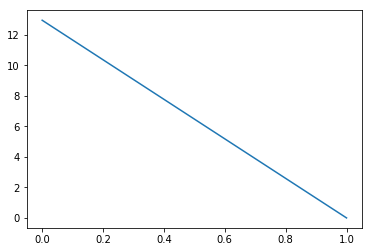

In [15]:
i = 9
h = df.iloc[:,i]
h = np.sort(h)
hmean = np.mean(h)
hstd = np.std(h)
pdf = norm.pdf(h, hmean, hstd)
plt.plot(h, pdf)

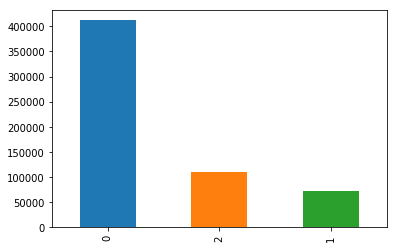

In [16]:
h = df.iloc[:,47]
h.value_counts().plot(kind='bar')

In [17]:
chitestmat = list()
colcount = len(df.columns)
for i in range(42,colcount) :
    ind_chi_test = chisquare(df.iloc[:,i])
    chitestmat.append(ind_chi_test[1])
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
display_all(chitestmat)

[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]

In [18]:
colcount = len(df.columns)
ttestmat = np.zeros((colcount,colcount))
for i in range(42,colcount) :
    for j in range(42,colcount) :
        if i != j :
            ind_t_test = ttest_ind(df.iloc[:,i],df.iloc[:,j])
            ttestmat[i][j] = ind_t_test[1]
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
display_all(ttestmat)

array([[0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000]])

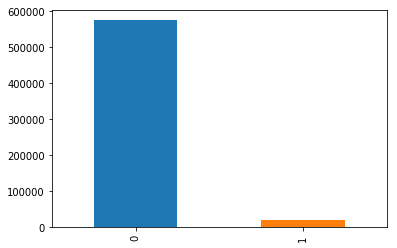

In [19]:
h = pd.Series(y.tolist())
h.value_counts().plot(kind='bar')

In [20]:
def TrainRandomForest(X_train,y_train,X_valid,y_valid):

    m = RandomForestClassifier(n_estimators=40,n_jobs=-1,oob_score=True)
    %time m.fit(X_train,y_train)
    res = [m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'): res.append(m.oob_score_)
    print(res)
    
    return m

In [21]:
def TrainLogisticRegression(X_train,y_train,X_valid,y_valid):
    m = LogisticRegression()
    %time m.fit(X_train, y_train)
    res = [m.score(X_train,y_train),m.score(X_valid,y_valid)]
    print(res)
    
    return m

In [22]:
def ReadyTestData(df_test,median_dict) :
    predmat = np.zeros((df_test.shape[0],2))
    
    df = df_test.copy()
    ids = df['id'].values
    df.drop(['id'],axis=1,inplace=True)
    
    df = preprocesstest(df,median_dict)
    
    for n,c in df.items():
        numericalize(df,c,n)
        
    return df,ids


def PredictTestSet(X_test, ids, predicted_model):
          
    y = predicted_model.predict(X_test)
    predmat = np.column_stack((ids,y)) 
    
    return predmat

def GetImportances(predictedmodel,df) :
    importances = predictedmodel.feature_importances_
    indices = np.argsort(importances)[::-1]
    df_imp = pd.DataFrame(columns=['cols','imp'])
    j = 0
    for f in range(df.shape[1]):
        df_imp.loc[j] = [df.columns[indices[f]],importances[indices[f]]]
        j = j + 1
    return df_imp
    

In [23]:
# pca = GetPCA(X_train,0.95)
# X_train = pca.transform(X_train)
# X_valid = pca.transform(X_valid)

In [24]:
predictedmodel = TrainRandomForest(X_train,y_train,X_valid,y_valid)

Wall time: 1min 20s
[0.9986497373029772, 0.96436, 0.963553415061296]


In [25]:
yvalid_predict = predictedmodel.predict(X_valid)
print(classification_report(y_valid, yvalid_predict))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     24087
          1       1.00      0.02      0.05       913

avg / total       0.97      0.96      0.95     25000



In [26]:
X_test,ids = ReadyTestData(df_test,mediandict)
# X_test = pca.transform(X_test)
predmat = PredictTestSet(X_test, ids, predictedmodel)
df_print = pd.DataFrame(predmat,columns=["id","target"])
df_print.to_csv("C:\\Users\\Admin\\Downloads\\QuarticPred.csv",index=False)

In [27]:
%time preds = np.stack([t.predict(X_valid) for t in predictedmodel.estimators_])
np.mean(preds[:,0]),np.std(preds[:,0])

Wall time: 1.14 s


(0.025, 0.15612494995995996)

In [28]:
df_imp = GetImportances(predictedmodel,df); df_imp[:10]

,cols,imp
0,num21,0.059027
1,num18,0.054392
2,num22,0.041903
3,der10,0.037912
4,der14,0.036902
5,der11,0.035492
6,cat14,0.032194
7,num12,0.031610
8,num2,0.031504
9,der3,0.031392


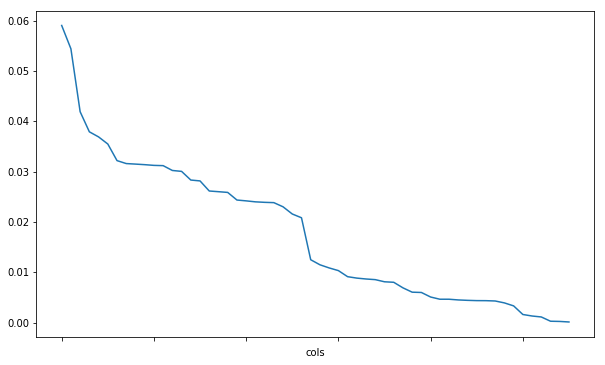

In [29]:
df_imp.plot('cols','imp',figsize=(10,6),legend=False)

In [30]:
to_keep = df_imp[df_imp.imp > 0.02].cols;len(to_keep)

27

In [31]:
mediandict = {}
df,y,mediandict = GetTrainData(df_train)
df_keep = df[to_keep].copy()
X_train_new,y_train_new,X_valid_new,y_valid_new = GetTrainValid(df_keep,y,250000)
newmodel = TrainRandomForest(X_train_new,y_train_new,X_valid_new,y_valid_new)

Wall time: 41.2 s
[0.9987312138728324, 0.963676, 0.9635057803468208]


In [32]:
fi = GetImportances(newmodel,df_keep); fi[:]

,cols,imp
0,num21,0.076268
1,num18,0.069160
2,num22,0.054397
3,der10,0.044581
4,der14,0.044068
5,der11,0.041398
6,cat14,0.039228
7,num12,0.037882
8,der3,0.037589
9,num2,0.037219


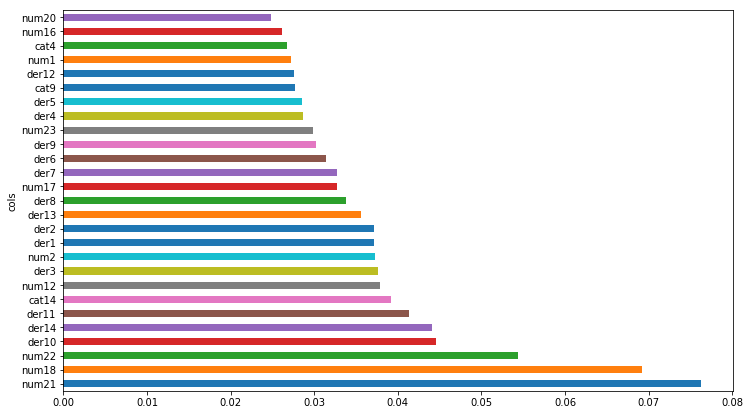

In [33]:
fi.plot('cols','imp','barh',figsize=(12,7),legend=False)

In [34]:
predictedmodel = TrainLogisticRegression(X_train,y_train,X_valid,y_valid)

Wall time: 1min 12s
[0.9635674255691768, 0.96348]


In [35]:
yvalid_predict = predictedmodel.predict(X_valid)
print(classification_report(y_valid, yvalid_predict))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     24087
          1       0.00      0.00      0.00       913

avg / total       0.93      0.96      0.95     25000



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
